<a href="https://colab.research.google.com/github/Rupeshkc222/heart-disease-prediction-model/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# **data collecting and preprocessing**

In [ ]:
d_s= pd.read_csv("/content/heart_disease_data.csv")

In [ ]:
d_s.shape

(303, 14)

In [ ]:
d_s.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
d_s.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
d_s.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
d_s["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

1-->not healthy
2-->healthy

In [ ]:
d_s.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **correlation**

In [ ]:
correlation=d_s.corr()

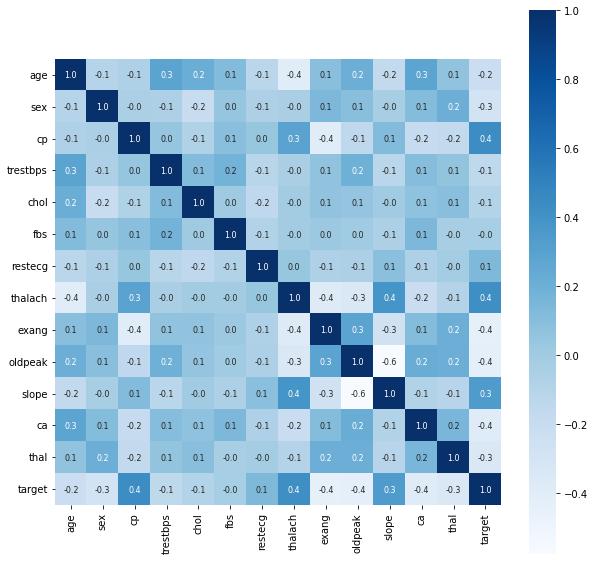

In [ ]:
# plt.figure(figsize=(10,10))
# sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot = True, annot_kws={'size':8},cmap='Blues')

check for skewness  

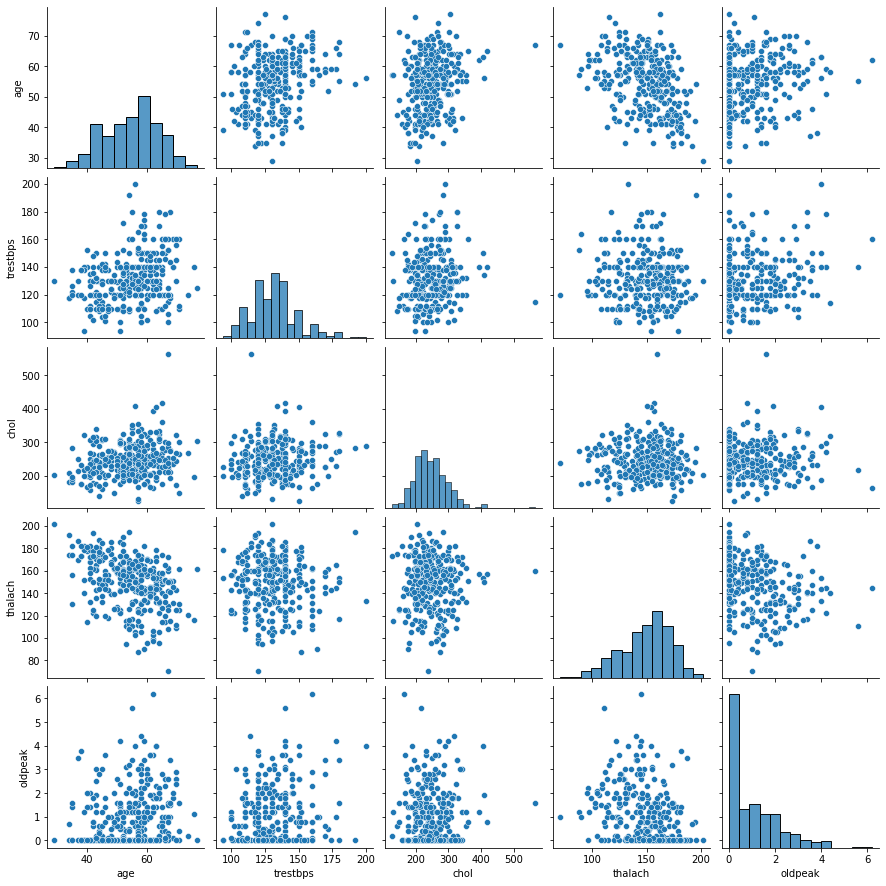

In [ ]:
# #pair plot  for checking skewness
# sns.pairplot(d_s[['age','trestbps','chol','thalach','oldpeak']])

In [ ]:
#check the value for skew

col=d_s[['age','trestbps','chol','thalach','oldpeak']]
col.skew()

age        -0.202463
trestbps    0.713768
chol        1.143401
thalach    -0.537410
oldpeak     1.269720
dtype: float64

skew to normal distribution

In [ ]:
#transform into normal distribution
for c in col:
  if d_s[c].skew() > 0.55:
    d_s[c] = np.log1p(col[c])
d_s[['age','trestbps','chol','thalach','oldpeak']].skew()  #check


age        -0.202463
trestbps    0.284837
chol        0.090242
thalach    -0.537410
oldpeak     0.396825
dtype: float64

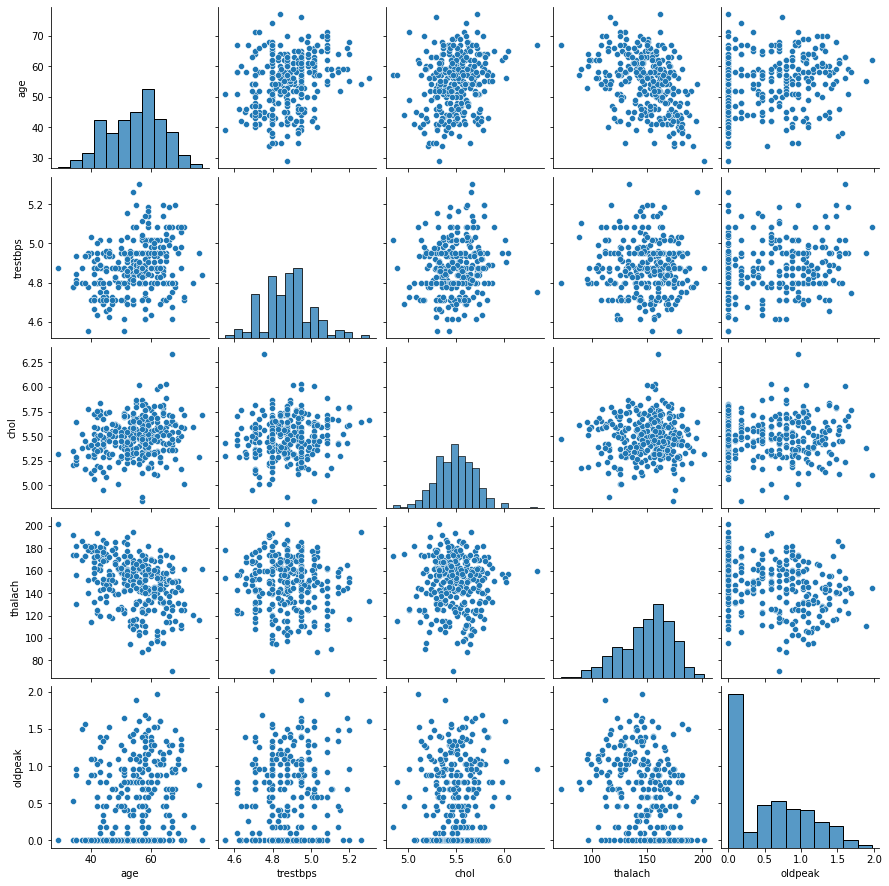

In [ ]:
# sns.pairplot(d_s[['age','trestbps','chol','thalach','oldpeak']])  #comparition from previous

outliers

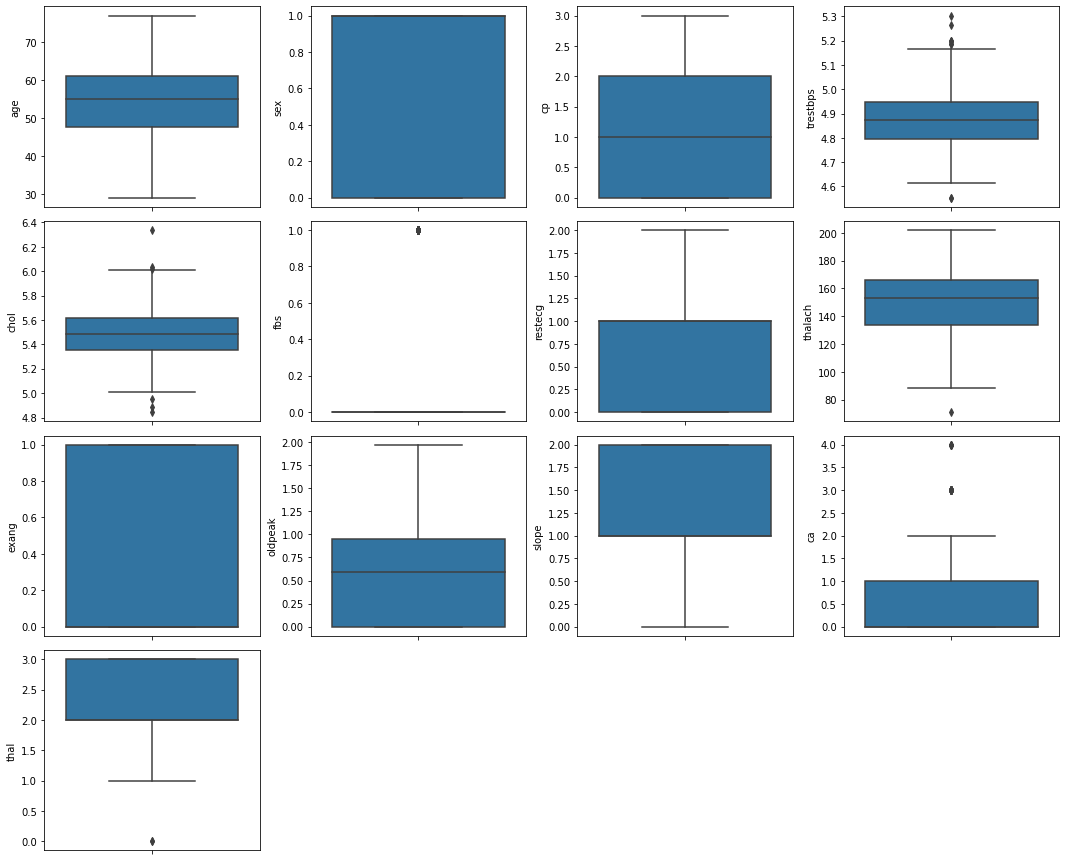

In [ ]:
#outliers
df=d_s.drop("target",axis=1)
fig=plt.figure(figsize=(15,15))
for i in range(len(df.columns)):
  fig.add_subplot(5,4,i+1)
  sns.boxplot(y=df.iloc[:,i])
plt.tight_layout()
plt.show()  



In [ ]:
d_s.shape

(303, 14)

Remove Outliers

In [ ]:
#Remove Outliers
from scipy.stats import zscore
z_score = abs(zscore(d_s))
print(" before removing outliers ",d_s.shape)
d_s=d_s.loc[(z_score < 3).all(axis=1)]
print(" after removing outliers ",d_s.shape)

 before removing outliers  (303, 14)
 after removing outliers  (292, 14)


**get difference in categorical and numerical data**

In [ ]:
#get differnce in categorical and numerical data
cont_val=[]
categorical_val=[]
for c in d_s.columns:
  if len(d_s[c].unique()) <= 10:
    categorical_val.append(c) 
  else :
    cont_val.append(c)  
categorical_val    

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

**encoding categorical data**

In [ ]:
categorical_val.remove("sex")
categorical_val.remove("target")
#we get required columns

#convert to dummies
d_s=pd.get_dummies(d_s,columns=categorical_val,drop_first=True)

d_s


,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,63,1,4.983607,5.455321,150,1.193922,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,37,1,4.875197,5.525453,187,1.504077,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,41,0,4.875197,5.323010,172,0.875469,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,56,1,4.795791,5.468060,178,0.587787,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,57,0,4.795791,5.872118,163,0.470004,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,4.948760,5.488938,123,0.182322,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
299,45,1,4.709530,5.579730,132,0.788457,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
300,68,1,4.976734,5.267858,141,1.481605,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
301,57,1,4.875197,4.882802,115,0.788457,0,0,0,0,...,1,0,1,1,0,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

s=StandardScaler()
d_s[cont_val]=s.fit_transform(d_s[cont_val])

d_s.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_2,thal_3
0,0.948071,1,0.826518,-0.189563,0.010173,1.180744,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-1.926432,1,-0.018356,0.171559,1.650646,1.773185,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,-1.484200,0,-0.018356,-0.870858,0.985590,0.572450,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0.174166,1,-0.637203,-0.123967,1.251612,0.022935,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0.284724,0,-0.637203,1.956600,0.586556,-0.202048,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0


# **separate the target**

In [ ]:
X=d_s.drop(columns="target",axis=1)
Y=d_s["target"]

In [ ]:
print(X,Y)

          age  sex  trestbps      chol   thalach   oldpeak  cp_1  cp_2  cp_3  \
0    0.948071    1  0.826518 -0.189563  0.010173  1.180744     0     0     1   
1   -1.926432    1 -0.018356  0.171559  1.650646  1.773185     0     1     0   
2   -1.484200    0 -0.018356 -0.870858  0.985590  0.572450     1     0     0   
3    0.174166    1 -0.637203 -0.123967  1.251612  0.022935     1     0     0   
4    0.284724    0 -0.637203  1.956600  0.586556 -0.202048     0     0     0   
..        ...  ...       ...       ...       ...       ...   ...   ...   ...   
298  0.284724    0  0.554945 -0.016465 -1.186929 -0.751563     0     0     0   
299 -1.041969    1 -1.309463  0.451040 -0.787895  0.406246     0     0     1   
300  1.500860    1  0.772956 -1.154845 -0.388861  1.730259     0     0     0   
301  0.284724    1 -0.018356 -3.137570 -1.541625  0.406246     0     0     0   
302  0.284724    0 -0.018356 -0.123967  1.074264 -1.099824     1     0     0   

     fbs_1  restecg_1  restecg_2  exang

# **splitting of data into train and test**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y ,random_state=42)

# **model training using Logistic Regression**

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

**model evaluation**

In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction , Y_train)

print("Accuracy on training data :", train_data_accuracy)

Accuracy on training data : 0.8627450980392157


In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)

print("Accuracy on test data :", test_data_accuracy)

Accuracy on test data : 0.8522727272727273


# **model training using SVM**

In [ ]:
from sklearn import svm

In [ ]:
svm=svm.SVC()
svm.fit(X_train,Y_train)

y_pre_svm=svm.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_pre_svm)

0.8636363636363636

# **model training using knearest classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

y_pre_knn=knn.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_pre_knn)

0.8409090909090909

In [ ]:
score=[]
for k in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  y_pre_knn=knn.predict(X_test)
  score.append(accuracy_score(y_pre_knn,Y_test))
score


[0.7613636363636364,
 0.7727272727272727,
 0.8295454545454546,
 0.8181818181818182,
 0.8409090909090909,
 0.8409090909090909,
 0.8295454545454546,
 0.8409090909090909,
 0.8068181818181818,
 0.8295454545454546,
 0.8068181818181818,
 0.8181818181818182,
 0.7954545454545454,
 0.8068181818181818,
 0.7840909090909091,
 0.8181818181818182,
 0.8068181818181818,
 0.8181818181818182,
 0.8068181818181818,
 0.8295454545454546,
 0.7954545454545454,
 0.8068181818181818,
 0.8181818181818182,
 0.8181818181818182,
 0.8068181818181818,
 0.8068181818181818,
 0.7954545454545454,
 0.8295454545454546,
 0.8181818181818182,
 0.8295454545454546,
 0.8295454545454546,
 0.8295454545454546,
 0.8181818181818182,
 0.8295454545454546,
 0.8181818181818182,
 0.8295454545454546,
 0.7954545454545454,
 0.8068181818181818,
 0.7954545454545454]

# **input system**

In [ ]:
# input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)
# input_numpy_arr = np.asarray(input_data)

# input_reshaped = input_numpy_arr.reshape(1,-1)

# prediction = model.predict(input_reshaped)
# print(prediction)

# if (prediction[0]==1):
#   print("you have heart disease")
# else:
#   print("congrats you have a health heart")  